# Project 3: House Price Prediction

Objective: Predict house prices based on various features like location, size, and house
characteristics.

## Analyze and Visualize the Data: Perform exploratory data analysis (EDA) to understand the dataset and
visualize trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

We will open the .csv file to perform exploratory data analysis (EDA) to understand the dataset and
visualize trends.

In [2]:
df = pd.read_csv("../data/house_prices.csv")
#df = pd.read_csv("cleaned_house_data.csv")
#df = df.drop(['Unnamed: 0'], axis=1)
#df.head()


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   Dwell_Type           1460 non-null   int64  
 2   Zone_Class           1460 non-null   object 
 3   LotFrontage          1201 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Road_Type            1460 non-null   object 
 6   Alley                91 non-null     object 
 7   Property_Shape       1460 non-null   object 
 8   LandContour          1460 non-null   object 
 9   Utilities            1460 non-null   object 
 10  LotConfig            1460 non-null   object 
 11  LandSlope            1460 non-null   object 
 12  Neighborhood         1460 non-null   object 
 13  Condition1           1460 non-null   object 
 14  Condition2           1460 non-null   object 
 15  Dwelling_Type        1460 non-null   o

## Data Description

In [16]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
Zone_Class,1460,5,RL,1151
Road_Type,1460,2,Pave,1454
Alley,91,2,Grvl,50
Property_Shape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
Dwell_Type,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Getting Null Values

In [13]:
def column_info(df):
    cols=[]
    dtypes=[]
    uniques=[]
    nuniques=[]
    nulls=[]
    null_per=[]
    for col in df.columns:
        cols.append(col)
        dtypes.append(df[col].dtype)
        uniques.append(df[col].unique())
        nuniques.append(df[col].nunique())
        nulls.append(df[col].isna().sum())
        null_per.append(100*(df[col].isna().sum())/len(df))

    return pd.DataFrame({'col':cols,'dtype':dtypes,'unique values':uniques,'count unique':nuniques,' count null':nulls,'percentage null':null_per})
    

In [14]:
null_per = column_info(df)
#null_per.sort_values("null_per", axis=0, ascending=False)
null_per.nlargest(20, "percentage null") 

,col,dtype,unique values,count unique,count null,percentage null
72,PoolQC,object,"[nan, Ex, Fa, Gd]",3,1453,99.520548
74,MiscFeature,object,"[nan, Shed, Gar2, Othr, TenC]",4,1406,96.301370
6,Alley,object,"[nan, Grvl, Pave]",2,1369,93.767123
73,Fence,object,"[nan, MnPrv, GdWo, GdPrv, MnWw]",4,1179,80.753425
25,MasVnrType,object,"[BrkFace, nan, Stone, BrkCmn]",3,872,59.726027
57,FireplaceQu,object,"[nan, TA, Gd, Fa, Ex, Po]",5,690,47.260274
3,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...",110,259,17.739726
58,GarageType,object,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...",6,81,5.547945
59,GarageYrBlt,float64,"[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....",97,81,5.547945
60,GarageFinish,object,"[RFn, Unf, Fin, nan]",3,81,5.547945


In [3]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
df_numeric.columns

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [14]:
df_numeric.corr()

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
Dwell_Type,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [13]:
df_numeric.corr()['Property_Sale_Price'].sort_values(ascending=False)

Property_Sale_Price    1.000000
OverallQual            0.796088
GrLivArea              0.693550
GarageCars             0.648683
GarageArea             0.631098
TotalBsmtSF            0.609097
1stFlrSF               0.599554
FullBath               0.557775
YearBuilt              0.534943
TotRmsAbvGrd           0.533466
YearRemodAdd           0.521141
MasVnrArea             0.471845
Fireplaces             0.463872
BsmtFinSF1             0.373409
LotFrontage            0.334225
OpenPorchSF            0.324959
WoodDeckSF             0.322209
2ndFlrSF               0.296304
HalfBath               0.282741
GarageYrBlt            0.268311
LotArea                0.265523
BsmtFullBath           0.234306
BsmtUnfSF              0.220669
BedroomAbvGr           0.160533
ScreenPorch            0.118327
MoSold                 0.057045
3SsnPorch              0.047416
PoolArea               0.028630
BsmtFinSF2            -0.008892
MiscVal               -0.021094
YrSold                -0.023725
LowQualF

<Axes: >

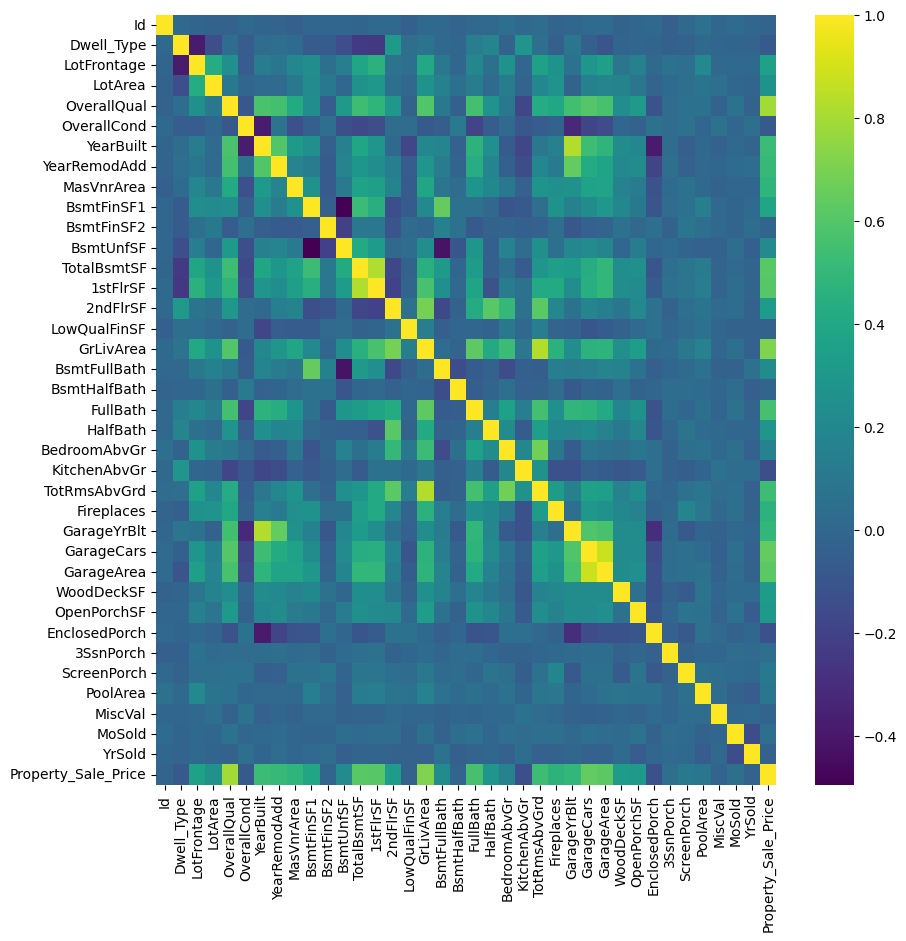

In [67]:
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(df_numeric.corr(), cmap="viridis" , ax=ax)

<Axes: xlabel='Feature', ylabel='Coefficient'>

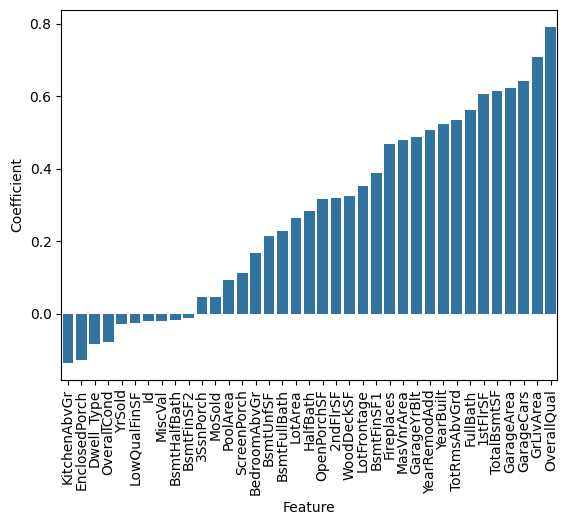

In [24]:
#draw the correlation of numerical features
coef_df = pd.DataFrame({
    'Feature': df_numeric.columns,
    'Coefficient': df_numeric.corr()['Property_Sale_Price']
})
coef_df = coef_df.sort_values(by=['Coefficient'])
coef_df.drop(labels=["Property_Sale_Price"], axis=0, inplace = True)
plt.xticks(rotation=90)
sns.barplot(x='Feature', y='Coefficient', data=coef_df)

In [25]:
corr_matrix = df_numeric.corr().abs()

# Flatten the matrix and remove diagonal part
corr_series = corr_matrix.unstack().sort_values(ascending=False)
corr_series = corr_series[corr_series != 1]

# Get the top 5 correlated features
top_40_correlated = corr_series.head(40)

# Output the feature names and their correlations
print(top_40_correlated.drop_duplicates())

GarageArea           GarageCars             0.882475
GarageYrBlt          YearBuilt              0.825667
TotRmsAbvGrd         GrLivArea              0.825489
1stFlrSF             TotalBsmtSF            0.819530
OverallQual          Property_Sale_Price    0.790982
GrLivArea            Property_Sale_Price    0.708624
                     2ndFlrSF               0.687501
BedroomAbvGr         TotRmsAbvGrd           0.676620
BsmtFinSF1           BsmtFullBath           0.649212
GarageYrBlt          YearRemodAdd           0.642277
Property_Sale_Price  GarageCars             0.640409
FullBath             GrLivArea              0.630012
Property_Sale_Price  GarageArea             0.623431
TotRmsAbvGrd         2ndFlrSF               0.616423
TotalBsmtSF          Property_Sale_Price    0.613581
2ndFlrSF             HalfBath               0.609707
Property_Sale_Price  1stFlrSF               0.605852
OverallQual          GarageCars             0.600671
                     GrLivArea              0.

In [4]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
df_cat.columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Id                      0.000000
Dwell_Type              0.000000
Zone_Class              0.000000
LotFrontage            17.739726
LotArea                 0.000000
                         ...    
MoSold                  0.000000
YrSold                  0.000000
SaleType                0.000000
SaleCondition           0.000000
Property_Sale_Price     0.000000
Length: 81, dtype: float64

In [17]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

PoolQC                 1453
MiscFeature            1406
Alley                  1369
Fence                  1179
MasVnrType              872
                       ... 
MoSold                    0
YrSold                    0
SaleType                  0
SaleCondition             0
Property_Sale_Price       0
Length: 81, dtype: int64

In [30]:
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing = missing_df[missing_df['Percentage'] > 0]
missing = missing.sort_values(by='Percentage', ascending=False)

In [31]:
missing

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [32]:
missing = missing.rename_axis('Feature')
missing.head()

,Missing Values,Percentage
Feature,,
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027


In [16]:
missing.shape

(15, 2)

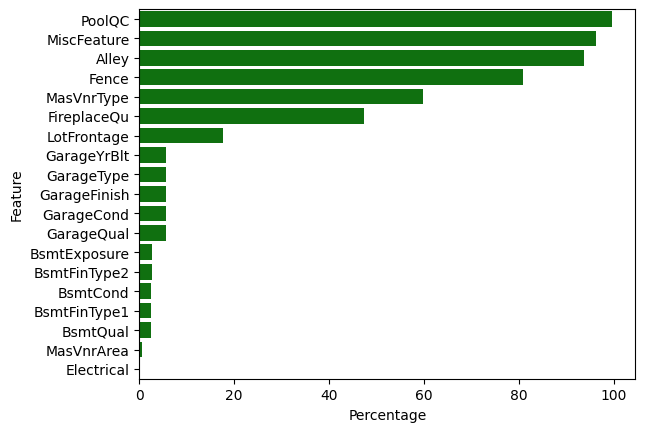

In [33]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')

plt.xticks();

(1.0, 0.0)

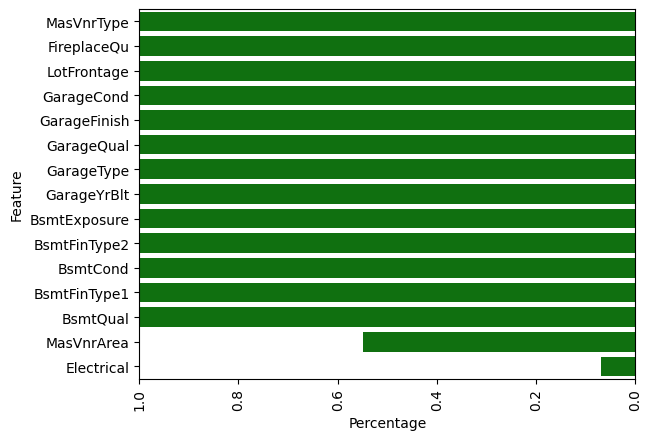

In [18]:
sns.barplot(y=missing['Percentage'].index,x=missing['Percentage'], color='green')
plt.xticks(rotation=90)
# Set 1% Threshold
plt.xlim(1, 0)

In [34]:
df[df['MasVnrArea'].isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

In [35]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [36]:
df[df['Electrical'].isnull()]['Electrical']

1379    NaN
Name: Electrical, dtype: object

- BsmtCond: Condition of the basement (a rating).
- BsmtQual: Quality of the basement (a rating).
- BsmtFinType1: Type of finished basement (e.g., rec room, living space).
- BsmtExposure: Exposure level of the basement (e.g., walkout, garden level).
- BsmtFinType2: Type of secondary finished basement (if applicable).

### The abbreviations for "Basement Condition" typically represent the following conditions:

- TA: Typical/Average
- Gd: Good
- Fa: Fair
- Po: Poor

In [42]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [43]:
df['BsmtCond'].isnull().sum()

np.int64(37)

### For "Basement Quality," the abbreviations typically stand for:

- Gd: Good
- TA: Typical/Average
- Ex: Excellent
- Fa: Fair

In [44]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [45]:
df['BsmtQual'].isnull().sum()

np.int64(37)

For Bsmt FinType2 (which describes the type of finish for the second finished area of the basement), the abbreviations typically mean:

- Unf: Unfinished
- BLQ: Below Average Quality
- ALQ: Average to Low Quality
- Rec: Recreational Room
- LwQ: Low Quality
- GLQ: Good Living Quarters

In [46]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [47]:
df['BsmtFinType2'].isnull().sum()

np.int64(38)

For BsmtExposure (which describes the exposure level of a basement), the abbreviations typically stand for:

- No: No exposure
- Gd: Good exposure
- Mn: Minor exposure
- Av: Average exposure
- These codes indicate how much of the basement is above ground level and its overall exposure to natural light and the outdoors.

تشير هذه الرموز إلى مقدار الطابق السفلي فوق مستوى سطح الأرض ومدى تعرضه الإجمالي للضوء الطبيعي والهواء الطلق.

In [49]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [50]:
df['BsmtExposure'].isnull().sum()

np.int64(38)

After reviewing the data related to the ground floor, we found that the entries without values for the basement mostly belong to houses that do not have a basement.

In [51]:
df[['BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']][df['BsmtCond'].isnull()]

,BsmtCond,BsmtQual,BsmtFinType1,BsmtExposure,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


- **GarageQual**: Quality of the garage (a rating).
- **GarageCond**: Condition of the garage (a rating).
- **GarageYrBlt**: Year the garage was built.
- **GarageFinish**: Interior finish of the garage (e.g., unfinished, finished).
- **GarageType**: Type of garage (e.g., attached, detached).

## Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.
### To Be Sure That there is no null value more than the 81 row

In [52]:
df[df['GarageType'].isnull()].shape

(81, 81)

In [53]:
df[df['GarageQual'].isnull()].shape

(81, 81)

In [54]:
df[df['GarageYrBlt'].isnull()].shape

(81, 81)

In [55]:
df[df['GarageFinish'].isnull()].shape

(81, 81)

In [56]:
df[df['GarageType'].isnull()].shape

(81, 81)

### Here you can see that when the [MasVnrArea] = 0, the [MasVnrType] is Nan.
### So we can assume that there is no Area no Type, set to None.

In [58]:
df[['MasVnrType', 'MasVnrArea']][df['MasVnrArea'] == 0]['MasVnrType'].isnull()

1       True
3       True
5       True
8       True
9       True
        ... 
1454    True
1455    True
1457    True
1458    True
1459    True
Name: MasVnrType, Length: 861, dtype: bool

In [59]:
df[['MasVnrType', 'MasVnrArea']][df['MasVnrArea'] == 0]['MasVnrType'].isnull().sum()

np.int64(859)

In [60]:
df[['MasVnrType', 'MasVnrArea']][(df['MasVnrArea'] == 0) & (df['MasVnrType'].isnull())]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


In [61]:
df[['MasVnrType', 'MasVnrArea']][(df['MasVnrArea'] == 0) & (df['MasVnrType'].notna())]

,MasVnrType,MasVnrArea
688,BrkFace,0.0
1241,Stone,0.0


In [62]:
df[['MasVnrType']].isnull().sum()

MasVnrType    872
dtype: int64

### Filling in Fireplace Quality based on Description Text

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [63]:
df[['FireplaceQu']].isnull().sum()

FireplaceQu    690
dtype: int64

### LotFrontage: Linear feet of street connected to property

In [64]:
df['LotFrontage'][df['LotFrontage'].isnull()]

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

### Impute Missing Data based on other Features

In [65]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [66]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     80.133333
Veenker    59.714286
Name: LotFrontage, dtype: float64

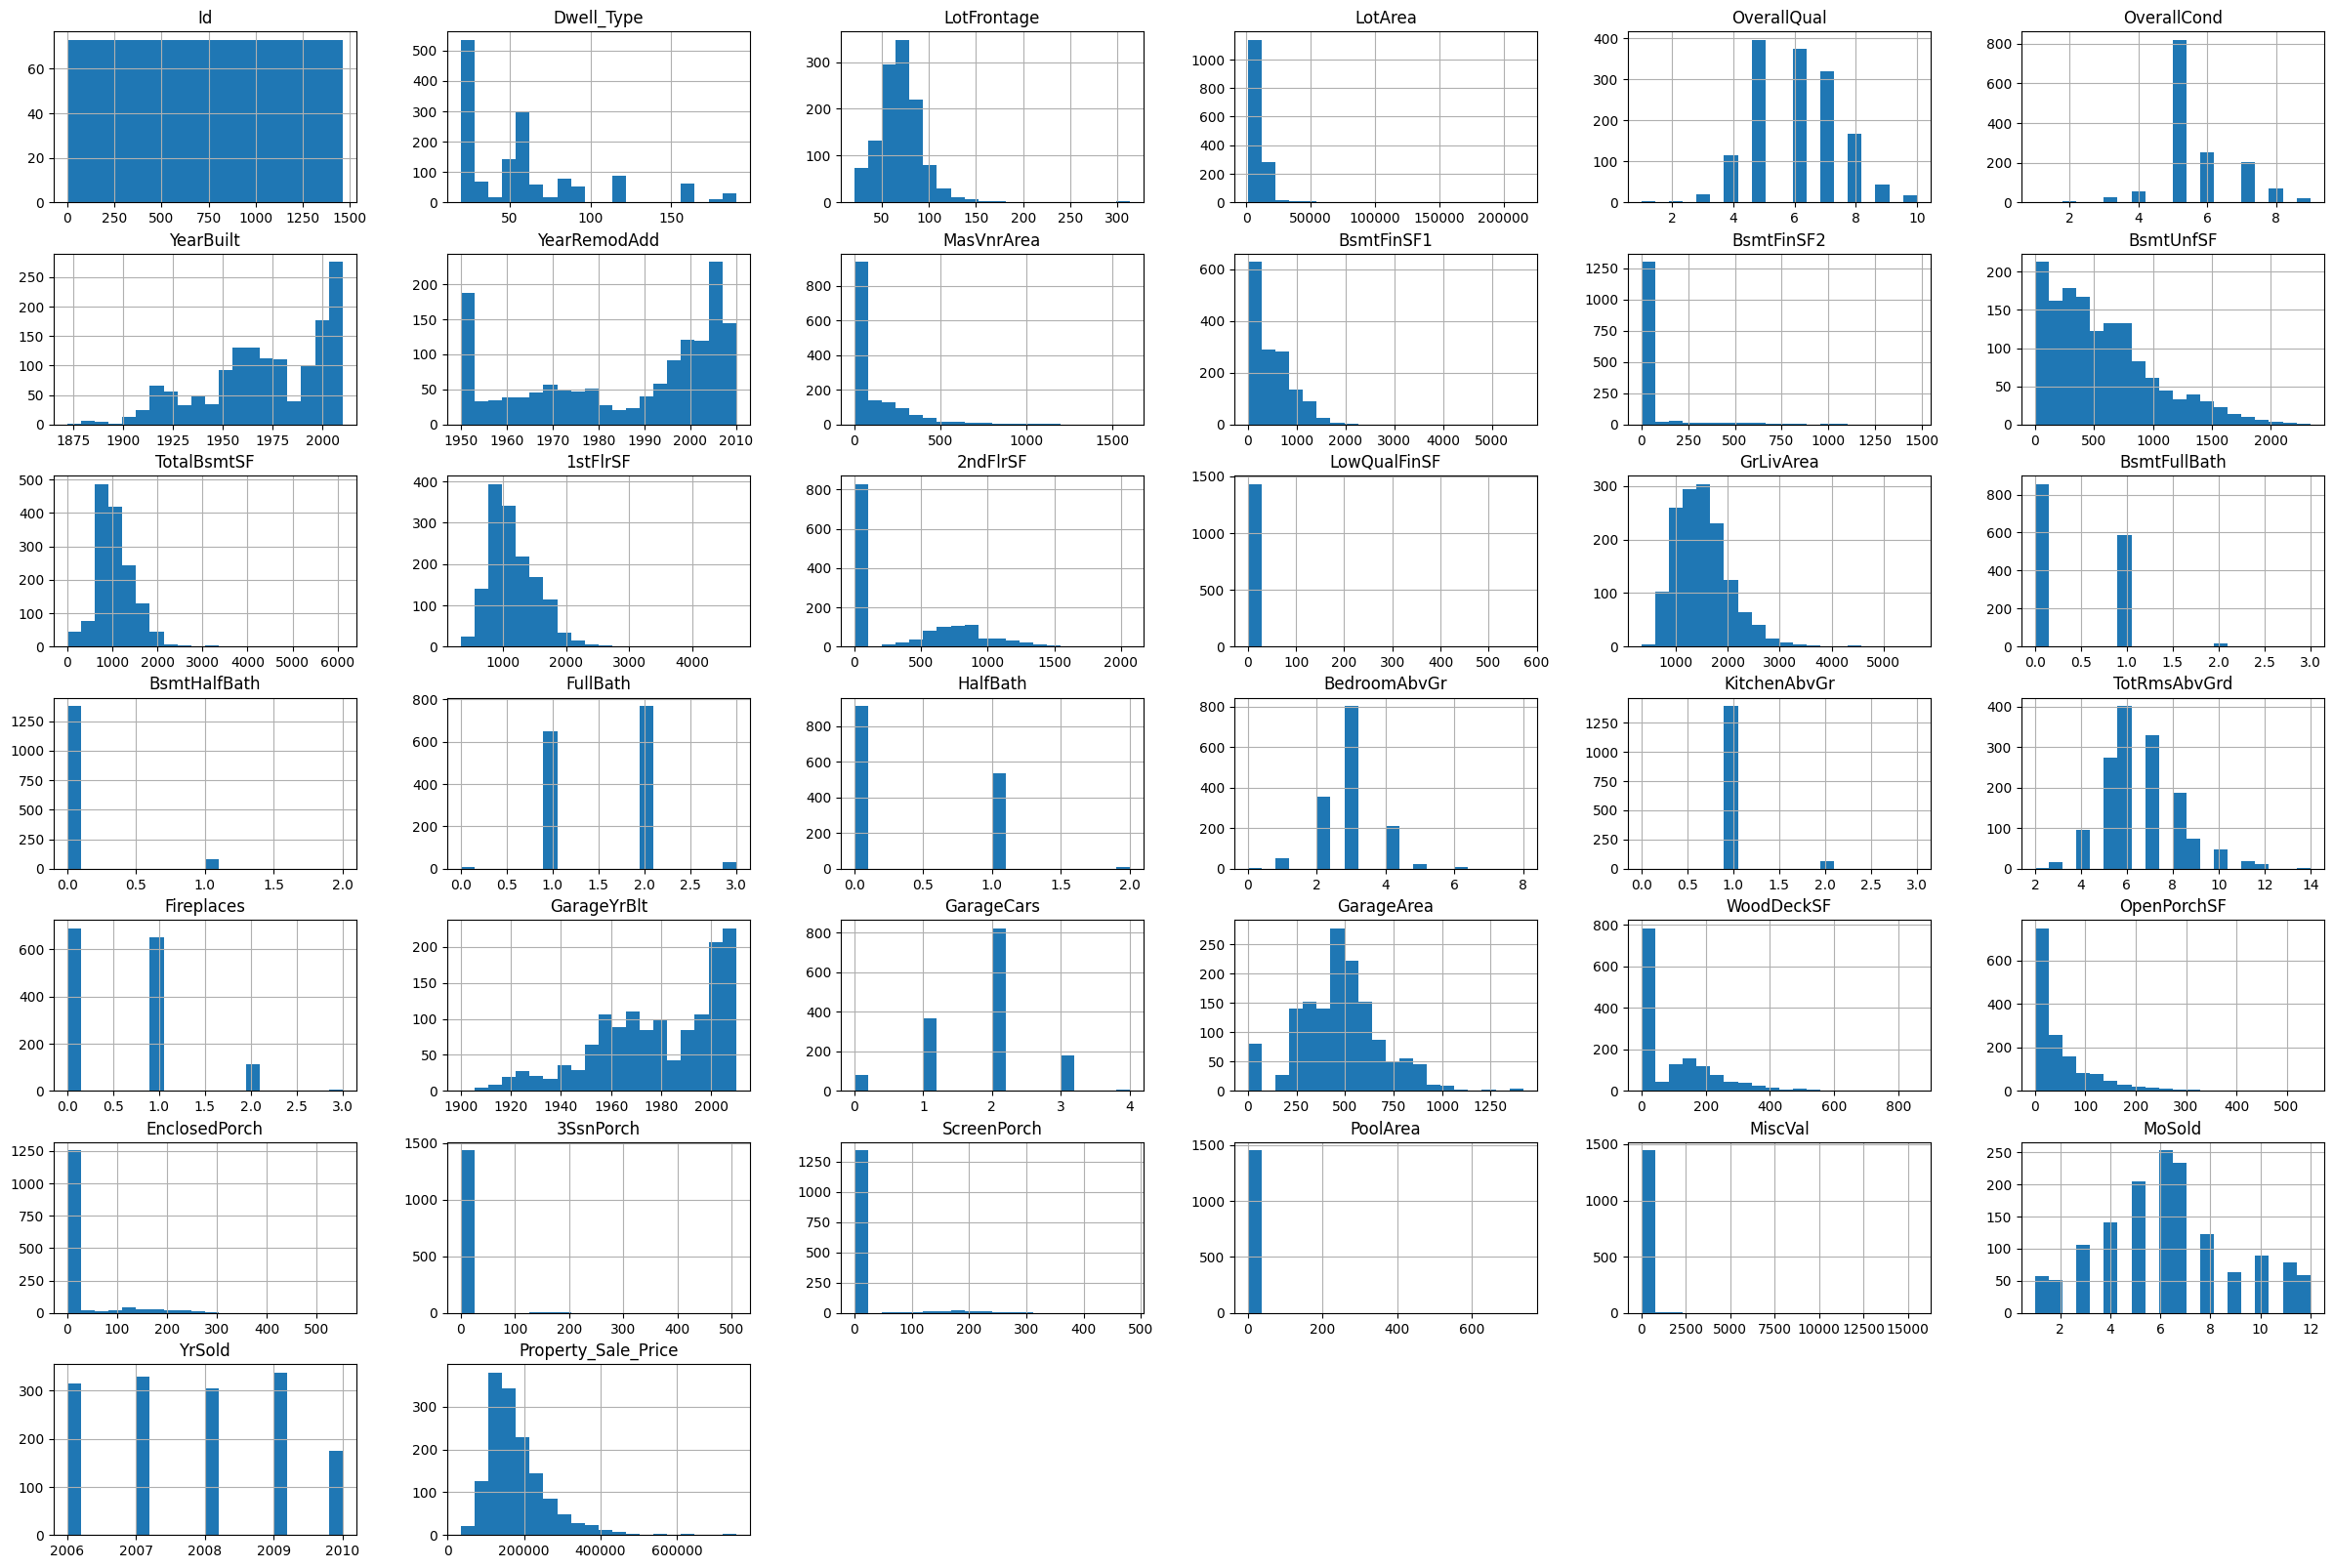

In [70]:
df.hist(bins=20, figsize=(30,20))
plt.show()

<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

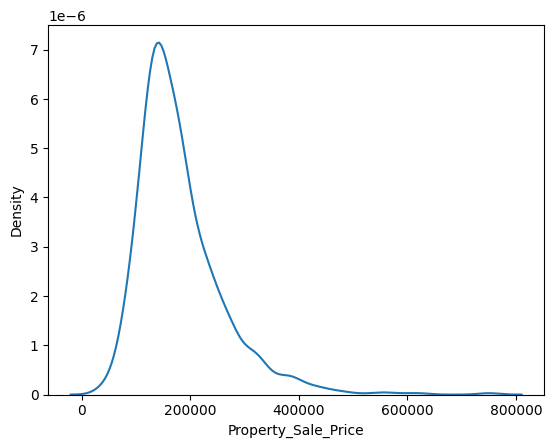

In [23]:
sns.kdeplot(df['Property_Sale_Price'])

In [69]:
for column in df_cat:
    print(column)
    print(df_cat[column].unique())
    print(df_cat[column].value_counts())

Zone_Class
['RL' 'RM' 'C (all)' 'FV' 'RH']
Zone_Class
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Road_Type
['Pave' 'Grvl']
Road_Type
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
[nan 'Grvl' 'Pave']
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Property_Shape
['Reg' 'IR1' 'IR2' 'IR3']
Property_Shape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
['AllPub' 'NoSeWa']
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
['Gtl' 'Mod' 'Sev']
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'M

In [5]:
from dash import Dash
from dash import dcc, html
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import plotly.express as px

In [14]:
app = Dash(__name__)

# App Layout
app.layout = html.Div([
    html.H3("Categorical Columns Analysis Graphs"),
    dcc.RadioItems(
        id="graph-RadioItems",
        options=[
            {'label': "Count Plot", 'value': "Count Plot"},
            {'label': "Scatter Plot", 'value': "Scatter Plot"},
            {'label': "Mean of Sale Price Plot", 'value': "Mean Count Plot"}
        ],
        value="Count Plot"
    ),
    dcc.Dropdown(
        id="Y Column Picker",
        options=[{'label': col, 'value': col} for col in df_cat.columns],
        value="Zone_Class"
    ),
    dcc.Graph(id="graph")    
])

# App Callback
@app.callback(
    Output("graph", "figure"),
    [Input("graph-RadioItems", "value"),
     Input("Y Column Picker", "value")]
)
def plot_graph(graph_type, column):
    if graph_type == "Count Plot":
        df_mean = df.groupby(column).agg({'Property_Sale_Price': 'count'}).reset_index()
        fig = px.bar(df_mean, x=column, y='Property_Sale_Price')
        #fig = px.bar(df_objs, x=column)
    elif graph_type == "Scatter Plot":
        df_data = pd.DataFrame({
            column: df_cat[column],
            'Property_Sale_Price': df_numeric['Property_Sale_Price']
        })
        fig = px.scatter(df_data,x=column, y='Property_Sale_Price')
    elif graph_type == "Mean Count Plot":
        df_mean = df.groupby(column).agg({'Property_Sale_Price': 'mean'}).reset_index()
        fig = px.bar(df_mean, x=column, y='Property_Sale_Price')
    else:
        fig = {}

    return fig

# Run the server
if __name__ == "__main__":
    app.run_server(debug=True, mode="inline", port=8070)

In [9]:
app = Dash(__name__)

app.layout = html.Div([
    html.H3("Numeric Columns Analysis Graphs"),
    dcc.RadioItems(
        id="graph-RadioItems",
        options=[
            {'label': "Box Plot", 'value': "Box Plot"},
            {'label': "Distribution", 'value': "Distribution"},
            {'label': "Scatter Plot", 'value': "Scatter Plot"}
        ],
        value="Box Plot"
    ),
    dcc.Dropdown(
        id="Y Column Picker",
        options=[{'label': col, 'value': col} for col in df_numeric.columns],
        value="Dwell_Type"
    ),
    dcc.Graph(id="graph")    
])

@app.callback(
    Output("graph", "figure"),
    [Input("graph-RadioItems", "value"),
     Input("Y Column Picker", "value")]
)
def plot_graph(graph_type, column):
    if graph_type == "Box Plot":
        fig = px.box(df_numeric, y=column)
    elif graph_type == "Distribution":
        fig = px.histogram(df_numeric, x=column)
    elif graph_type == "Scatter Plot":
        df_data = pd.DataFrame({
            column: df_numeric[column],
            'Property_Sale_Price': df_numeric['Property_Sale_Price']
        })
        fig = px.scatter(df_data, x='Property_Sale_Price',y=column)
    else:
        fig = {}  

    return fig

if __name__ == "__main__":
    app.run_server(debug=True, mode="inline", port=8090)

In [11]:
df[["Property_Sale_Price","Property_Sale_Price_natural_log"]].mean()

Property_Sale_Price                180149.242279
Property_Sale_Price_natural_log        12.021984
dtype: float64

In [11]:
df.groupby('Zone_Class').agg({'Property_Sale_Price': 'count'})

,Property_Sale_Price
Zone_Class,
C (all),10
FV,65
RH,16
RL,1151
RM,218
